## Fetch the Data and Visualize Data

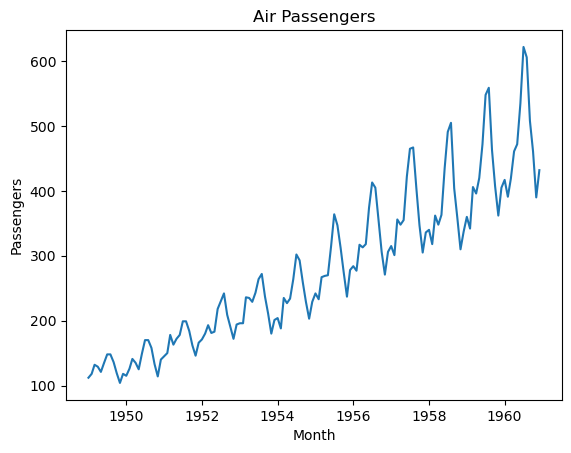

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv('air_passengers.csv')

# Convert the 'Month' column to datetime
df['Month'] = pd.to_datetime(df['Month'])

# Set 'Month' as the index
df.set_index('Month', inplace=True)

df['Passengers'] = df
plt.plot(df)
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('Air Passengers')
plt.show()

## Determine p,d,q,s parameters and clear trend and seasonality

In [8]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# d = # of differencing

# First, test for stationarity

result = adfuller(df['Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# If p-value > 0.05, the series is non-stationary, we need to take differences
if result[1] > 0.05:
    df['diff_1'] = df['Passengers'].diff()
    result = adfuller(df['diff_1'].dropna())
    print('ADF Statistic after 1st diff: %f' % result[0])
    print('p-value after 1st diff: %f' % result[1])
    d = 1
else:
    d = 0

# s = seasonality component
s = 12
df 
# Then, decompose the series to find the seasonal component
decomposition = sm.tsa.seasonal_decompose(df['Passengers'], model='additive', period=s)

df['trend'] = decomposition.trend
df['seasonal'] = decomposition.seasonal
df['residual'] = decomposition.resid
df.dropna(inplace=True)  # Drop rows with NaN values
# Detrend and deseasonalize by dividing by the trend and seasonal components
df['detrended'] = df['Passengers'] / df['trend']
df['deseasonalized'] = df['detrended'] / df['seasonal']
df

ADF Statistic: 0.697249
p-value: 0.989783
ADF Statistic after 1st diff: -2.698866
p-value after 1st diff: 0.074235


,Passengers,diff_1,trend,seasonal,residual,detrended,deseasonalized,lag_1,lag_2,lag_3,rolling_mean,reconstructed
Month,,,,,,,,,,,,
1950-04-01,135,-6.0,136.416667,-8.489390,7.072724,0.989615,-0.116571,8.324495,29.104798,8.498737,14.683081,867.186620
1950-05-01,125,-10.0,137.416667,-5.364390,-7.052276,0.909642,-0.169570,6.619949,8.324495,29.104798,2.344697,999.895114
1950-06-01,149,24.0,138.750000,32.464776,-22.214776,1.073874,0.033078,-7.910354,6.619949,8.324495,-8.814394,1174.078225
1950-07-01,170,21.0,140.916667,67.610610,-38.527276,1.206387,0.017843,-25.152778,-7.910354,6.619949,-22.603535,1378.844600
1950-08-01,170,0.0,143.166667,66.548110,-39.714776,1.187427,0.017843,-34.747475,-25.152778,-7.910354,-31.963384,1584.853400
...,...,...,...,...,...,...,...,...,...,...,...,...
1959-08-01,559,11.0,435.125000,66.548110,57.326890,1.284688,0.019305,53.460859,11.097222,4.006313,41.869949,31833.322705
1959-09-01,463,-96.0,437.708333,16.885610,8.406057,1.057782,0.062644,61.051768,53.460859,11.097222,41.094697,32287.615270
1959-10-01,407,-56.0,440.958333,-22.231057,-11.727276,0.922990,-0.041518,8.771465,61.051768,53.460859,18.835859,32707.886213


In [3]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# p = AR component
p = 3

for i in range(1, p+1):
    df[f'lag_{i}'] = df['residual'].shift(i)


# q = MA component
q = 3

df['rolling_mean'] = df['residual'].rolling(window=q).mean()

df.dropna(inplace=True)  # Drop rows with NaN values

df

,Passengers,diff_1,trend,seasonal,residual,detrended,deseasonalized,lag_1,lag_2,lag_3,rolling_mean
Month,,,,,,,,,,,
1949-10-01,119,-17.0,128.583333,-20.642677,11.059343,0.925470,-0.044833,-8.478535,-42.073232,-42.622475,-13.164141
1949-11-01,104,-15.0,129.000000,-53.593434,28.593434,0.806202,-0.015043,11.059343,-8.478535,-42.073232,10.391414
1949-12-01,118,14.0,129.750000,-28.619949,16.869949,0.909441,-0.031776,28.593434,11.059343,-8.478535,18.840909
1950-01-01,115,-3.0,131.250000,-24.748737,8.498737,0.876190,-0.035403,16.869949,28.593434,11.059343,17.987374
1950-02-01,126,11.0,133.083333,-36.188131,29.104798,0.946775,-0.026163,8.498737,16.869949,28.593434,18.157828
...,...,...,...,...,...,...,...,...,...,...,...
1960-02-01,391,-26.0,461.375000,-36.188131,-34.186869,0.847467,-0.023418,-14.584596,-17.005051,-30.239899,-21.925505
1960-03-01,419,28.0,465.208333,-2.241162,-43.967172,0.900672,-0.401877,-34.186869,-14.584596,-17.005051,-30.912879
1960-04-01,461,42.0,469.333333,-8.036616,-0.296717,0.982244,-0.122221,-43.967172,-34.186869,-14.584596,-26.150253


24


,residual
Month,
1958-01-01,-10.603202
1958-02-01,-23.718943
1958-03-01,-18.644869
1958-04-01,-23.510610
1958-05-01,-12.343943
1958-06-01,21.576890
1958-07-01,41.556057
1958-08-01,54.785224
1958-09-01,0.614390


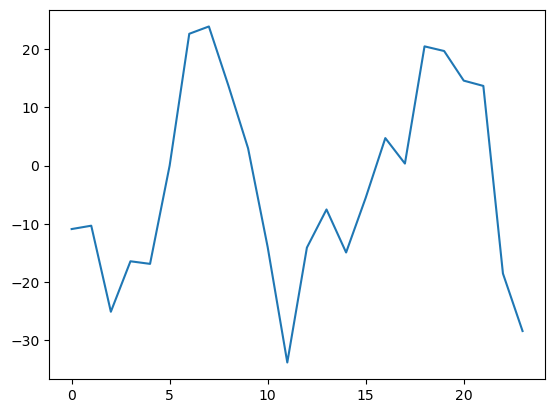

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # for example

# Select features and target
X = df[['lag_1', 'lag_2', 'lag_3', 'rolling_mean']]
y = df['residual']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Fit model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Predict residuals
residuals_predicted = model.predict(X_test)
plt.plot(residuals_predicted)
print(len(residuals_predicted))
test_df = pd.DataFrame(y_test)
test_df

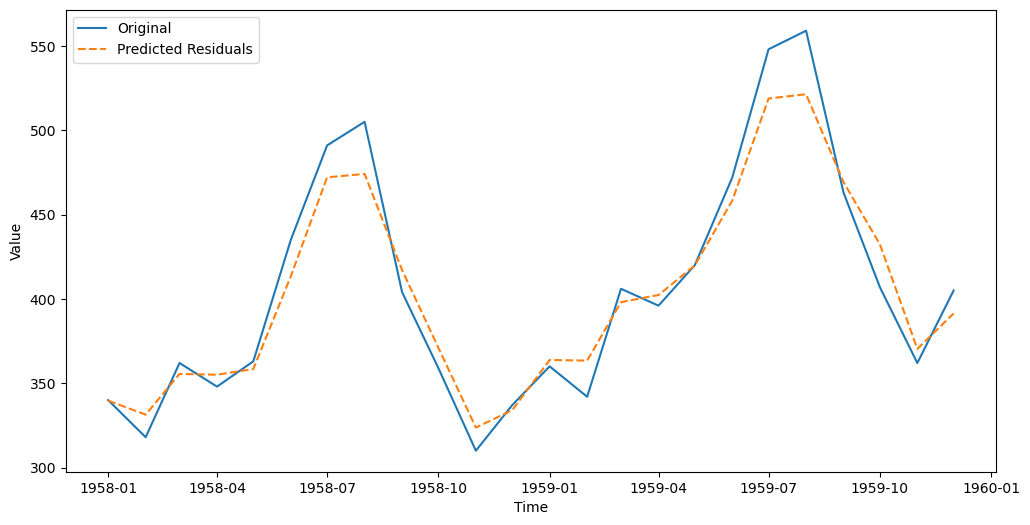

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for the predicted residuals
residuals_predicted_df = pd.DataFrame(residuals_predicted, index=X_test.index, columns=['predicted_residuals'])
# Add trend and seasonality back to the perdicted residual
residuals_predicted_df['reconstructed'] = df['trend'] + df['seasonal'] + residuals_predicted_df['predicted_residuals']

# Plot
fig, ax = plt.subplots(figsize=(12,6))

# Plot the latter part of the original time series
ax.plot(df.loc[X_test.index, 'Passengers'], label='Original')

# Plot the predicted residuals
ax.plot(residuals_predicted_df['reconstructed'], label='Predicted Residuals', linestyle='--')

ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend()
plt.show()


In [74]:
from sklearn.metrics import mean_squared_error

# Assuming 'Passengers' is your original data and 'reconstructed' is your predicted data
mse = mean_squared_error(df.loc[X_test.index, 'Passengers'], residuals_predicted_df['reconstructed'])

print("Mean Squared Error: ", mse)

Mean Squared Error:  273.13035075180943
